In [59]:
from geodata import Dataset
from geodata.model.wind import WindExtrapolationModel
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

In [24]:
dataset = Dataset(
    module="merra2",
    weather_data_config="slv_flux_hourly",
    years=slice(2010, 2010),
    months=slice(1,1)
)

model = WindExtrapolationModel(dataset)
model.prepare()
ds = xr.open_mfdataset(model.files)

2023-08-24 15:46:45,832 - geodata.dataset - INFO - Using global bounds.
2023-08-24 15:46:45,843 - geodata.dataset - INFO - Directory /Users/apple/.local/geodata/merra2 found, checking for completeness.
2023-08-24 15:46:45,852 - geodata.dataset - INFO - Directory complete.
2023-08-24 15:46:54,992 - geodata - INFO - The model is already prepared.


In [25]:
speed1 = model.estimate(
    height=2,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [26]:
speed1loc = speed1.isel(lat=0, lon=0)
speed1loc = speed1loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

In [28]:
speed2 = model.estimate(
    height=10,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [29]:
speed2loc = speed2.isel(lat=0, lon=0)
speed2loc = speed2loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

In [30]:
speed3 = model.estimate(
    height=50,
    years=slice(2010, 2010),
    months=slice(1, 1)
)

In [31]:
speed3loc = speed3.isel(lat=0, lon=0)
speed3loc = speed3loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [32]:
speed4 = model.estimate(
    height=80, # extrapolation in high heights
    years=slice(2010, 2010),
    months=slice(1, 1)
)

log pattern, actual hub height (no need for model)


In [33]:
speed4loc = speed4.isel(lat=0, lon=0)
speed4loc = speed4loc.load()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


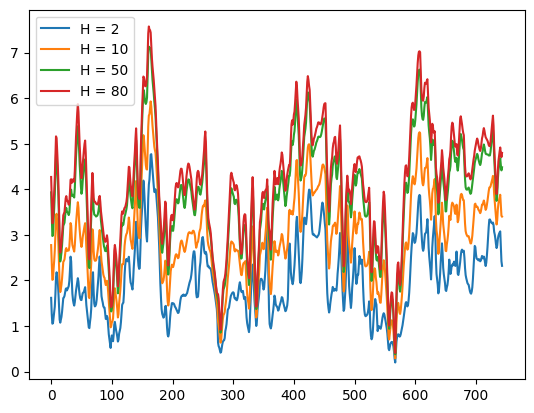

In [34]:
plt.plot(speed1loc, label='H = 2');
plt.plot(speed2loc, label='H = 10');
plt.plot(speed3loc, label='H = 50');
plt.plot(speed4loc, label='H = 80');
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in exp
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: overflow encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for

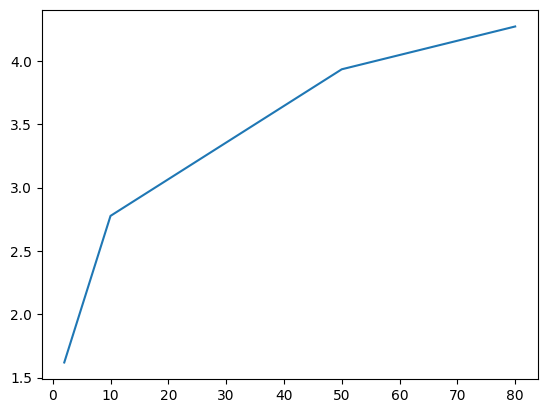

In [106]:
plt.plot([2,10,50,80], [speed1.isel(lon=0, lat=0, time=0).values
, speed2.isel(lon=0, lat=0, time=0).values
, speed3.isel(lon=0, lat=0, time=0).values, speed4.isel(lon=0, lat=0, time=0).values]);